# Load methods

In [4]:
%%capture
%run micropile_buckling.ipynb

# Calculate and display results
Benchmark: Vogt, N., & Vogt, S. (2013). Biegeknickwiderstand von Mikropfählen gemäß den Eurocodes. Bautechnik, 90(9), 550-558.

CROSS-SECTIONAL PARAMETERS
A = 1963.50 [mm^2]; I = 30.68 [cm^4]; EI = 61.36 [kNm^2]; fyA = 981.75 [kN]

MAXIMAL MOBILIZED LATERAL DISPLACEMENT AND STRESS (SOIL-PILE INTERACTION)
c_u = 25.00 [kN/m^2]
w_f = 14.90 [mm]
p_f = 228.54 [kN/m^2]

DESIGN RESISTANCE AGAINST BUCKLING
Lcr = 1.10 [m]; Ncr = 959.48 [kN]
Nb_Rd = 475.94 [kN]


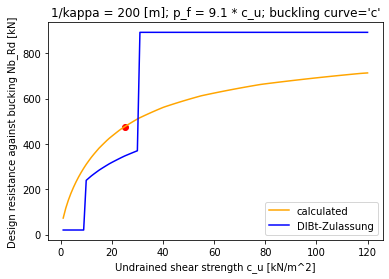

In [5]:
# Cross-sectional parameters
d = 50      # steel bar diameter [mm]
D = 270     # pile shaft diameter [mm]
E = 200000  # Young's modulus [kN/m^2]
fy = 500    # characteristic yield stress [kN/m^2]
A, I, EI, fyA = get_cross_section_parameters_circular(d, D, E, fy)
print('CROSS-SECTIONAL PARAMETERS')
print('A = {0:.2f} [mm^2]; I = {1:.2f} [cm^4]; EI = {2:.2f} [kNm^2]; fyA = {3:.2f} [kN]\n'.format(A, I, EI, fyA))

# Selection for p-y cur2e
c_u = 25 # kN/m^2
w_f = get_w_f_elastoplastic_eq1(D, c_u)
p_f = get_p_f_elastoplastic_eq2(c_u)
#p_f = 10.5*c_u
print('MAXIMAL MOBILIZED LATERAL DISPLACEMENT AND STRESS (SOIL-PILE INTERACTION)')
print('c_u = {0:.2f} [kN/m^2]'.format(c_u))
print('w_f = {0:.2f} [mm]'.format(w_f))
print('p_f = {0:.2f} [kN/m^2]\n'.format(p_f))

# Micropile length and buckling parameters
L = 5 		        # [m]
k_imp = 1/200	        # [1/m]
buckling_curve = 'c'    # {a0, a, b, c, d}, buckling curves in Figure 6.4, EC3
gamma_M = 1.1

# Buckling resistance check for the given c_u value
Lcr, Ncr = get_Ncr_by_iteration(w_f*0.001, EI, p_f, D*0.001, k_imp, L)
Nb_Rd = get_Nb_Rd_EC3(fyA, Ncr, buckling_curve, gamma_M)
print('DESIGN RESISTANCE AGAINST BUCKLING')
print('Lcr = {0:.2f} [m]; Ncr = {1:.2f} [kN]'.format(Lcr, Ncr))
print('Nb_Rd = {0:.2f} [kN]'.format(Nb_Rd))

# Data generation and plotting
display_micropile_buckling_resistance(D, EI, fyA, k_imp, L, p_f, c_u, Nb_Rd, buckling_curve, gamma_M)